In [31]:
import numpy as np
import matplotlib.pyplot as plt
import linear_regression as linreg
from sklearn.metrics import mean_absolute_error

# Load data
data = np.loadtxt(
    './data/Student_Performance.csv',
    delimiter=',',
    skiprows=1,
    dtype=[
        ('Hours Studied', 'float'),
        ('Previous Scores', 'float'),
        ('Extracurricular Activities', 'U3'),
        ('Sleep Hours', 'float'),
        ('Sample Question Papers Practiced', 'float'),
        ('Performance Index', 'float'),
    ]
)

In [32]:
# Convert data for machine learning
def convert_data(raw_data):
    m = len(data)
    perf_idx = 5
    
    x_train = np.zeros((m, perf_idx))
    y_train = np.zeros(m)
    for i in range(m):
        entry = data[i]
        row = np.zeros(perf_idx)
        for j in range(perf_idx):
            val = entry[j]
            if val == 'Yes':
                val = 1
            elif val == 'No':
                val = 0
            row[j] = val
        x_train[i] = row
        y_train[i] = entry[perf_idx]
    return x_train, y_train
    
x_train, y_train = convert_data(data)

print(x_train[0:10])
print(y_train[0:10])

[[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 [ 5. 52.  1.  5.  2.]
 [ 7. 75.  0.  8.  5.]
 [ 3. 78.  0.  9.  6.]
 [ 7. 73.  1.  5.  6.]
 [ 8. 45.  1.  4.  6.]
 [ 5. 77.  0.  8.  2.]
 [ 4. 89.  0.  4.  0.]]
[91. 65. 45. 36. 66. 61. 63. 42. 61. 69.]


In [33]:
# OPTIONAL: normalize data
mu = np.mean(x_train)
sigma = np.std(x_train)

x_norm = (x_train - mu)/sigma

In [34]:
# Define initial weights and biases
w = np.array(np.random.uniform(0, 20, size=5))
b = np.random.uniform(0, 20)

In [35]:
# Learning rate was chosen through experimenting with different values
# until it becomes too large (cost keeps rising)
learning_rate = 0.3
num_iter = 1000

cost_history, w_res, b_res = linreg.fit(x_norm, y_train, w, b, learning_rate, num_iter)

[0] 833.1755714491525
[100] 19.15927938633998
[200] 12.814489810878827
[300] 8.884693665855567
[400] 6.437400562317028
[500] 4.904368501270362
[600] 3.9377851116283997
[700] 3.323857000017942
[800] 2.9306179319396866
[900] 2.676265719884513


In [36]:
print(f'Weights and bias found: {w_res}, {b_res}, after, {len(cost_history)} iterations')

Weights and bias found: [70.4024343  28.02352089 -0.56553863  5.98985317  3.67310189], 36.832361954594305, after, 1000 iterations


Text(0, 0.5, 'Cost')

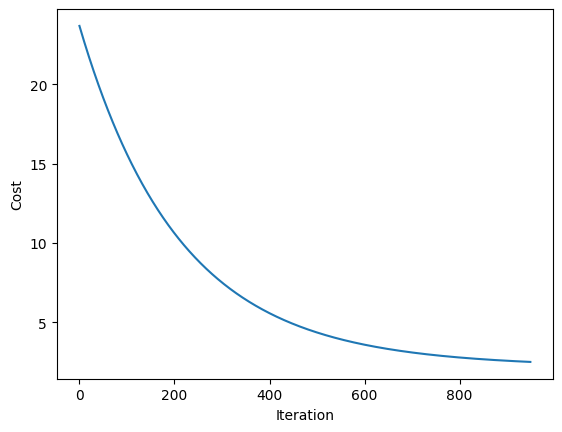

In [37]:
# visualize learning process
fig, ax = plt.subplots()
# discard the first 50 cost values since they drop very quickly
ax.plot(np.arange(len(cost_history[50:])), cost_history[50:])
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

In [38]:
# test first few predictions

def test(X, y, w, b):
    m = X[:10].shape[0]
    for i in range(m):
        prediction = linreg.model(X[i], w, b)
        target = y[i]
        print('{:.2f}  {:.2f}, {:.2f}'.format(prediction, target, abs(prediction - target)))

test(x_norm, y_train, w_res, b_res)

90.65  91.00, 0.35
64.60  65.00, 0.40
43.80  45.00, 1.20
36.67  36.00, 0.67
66.43  66.00, 0.43
59.57  61.00, 1.43
63.84  63.00, 0.84
37.54  42.00, 4.46
62.93  61.00, 1.93
71.50  69.00, 2.50


Our model is able to predict the performance index quite close to the target values, with single digit errors so far.

In [39]:
# Evaluate the model
m = x_train.shape[0]
y_predict = []
for i in range(m):
    y_predict.append(linreg.model(x_norm[i], w_res, b_res))

mae1 = mean_absolute_error(y_predict, y_train)
print(mae1)

1.780713651636858


We can see that the orange areas overlap with most of the graph of the training data. This indicates that our model is able to predict quite well so far.

In [40]:
# Scikit-Learn implementation
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
skx_norm = scaler.fit_transform(x_train)

In [41]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(skx_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 8, number of weight updates: 80001.0


In [42]:
b_norm = sgdr.intercept_[0]
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")


model parameters:                   w: [ 7.39014027 17.64529078  0.31628656  0.78807972  0.5912262 ], b:55.181690138056


In [43]:
# test first few predictions
test(skx_norm, y_train, w_norm, b_norm)

91.71  91.00, 0.71
63.10  65.00, 1.90
45.00  45.00, 0.00
36.53  36.00, 0.53
67.02  66.00, 1.02
59.32  61.00, 1.68
64.43  63.00, 1.43
38.33  42.00, 3.67
62.73  61.00, 1.73
69.81  69.00, 0.81


In [44]:
# Evaluate the model
m = x_train.shape[0]
y_predict_sgdr = []
for i in range(m):
    y_predict_sgdr.append(linreg.model(x_norm[i], w_res, b_res))

mae2 = mean_absolute_error(y_predict_sgdr, y_train)
print(mae2)

1.780713651636858


In [45]:
print('MAE of our implementation: {:.2f}'.format(mae1))
print('MAE of Scikit-Learn implementation: {:.2f}'.format(mae1))

MAE of our implementation: 1.78
MAE of Scikit-Learn implementation: 1.78


Our model and Scikit-learn's model have the result. But Scikit-learn runs much faster (instant result vs. couple of minutes)